## Red Rock Canyon Data Project

Las Vegas is known for many things, the night life, the casinos, it's history with the infamous mob and, of course, the fact that it's a large city plopped down in the middle of a desert. I've personally never been very interested in clubs, partying, betting or gambling. Despite my apathy towards the main draws of the city, Las Vegas still has ton's of things that I do enjoy. One of those many things is it's natural landscape. Now, I know what you're thinking, what's so cool about a hot, arid, desert? Well they call it the Las Vegas *Valley* for a reason. The city is surrounded by mountains. No matter what direction you look in, you can find a beautiful mountain range of some sort. And with mountains comes one of my favorite activities, **hiking!** 

To the west of Las Vegas lies the world famous Red Rock Canyon. While I was recently looking the Red Rock Canyon's [official website](https://www.redrockcanyonlv.org/), I noticed that there were metrics available on each of the trails' web-pages. Me being the type of person I am (*read: Nerd*), the first thing that came to my mind was, "This is **DATA**". So with that, a new project was born. This blog post is going to detail the steps I went through while completing this project. 

This project was relatively small so I only needed to import a handful of libraries. I'm not going to go into detail about each individual library, but here are the ones that I put to use.  

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import seaborn as sns


After importing the above libraries, my next goal was to scrape Red Rock Canyon's web pages for the information needed. A combination of the libraries Requests and bs4/BeautifulSoup  made this fairly simple to do. 

In [2]:

#Setting user agent to prevent errors associated with "empty" user agents when doing an http request.
user_agent = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}

#Using requests to retrieve both html pages containing the target data. 
trails_page = requests.get(url = 'https://www.redrockcanyonlv.org/lasvegas/hikes-trails/', headers = user_agent).text
trails_page2 = requests.get(url = 'https://www.redrockcanyonlv.org/lasvegas/hikes-trails/page/2/',headers = user_agent).text

#Creating BeautifulSoup objects using the html pages we requested.
trails_soup = BeautifulSoup(trails_page, 'html.parser')
trails_soup2 = BeautifulSoup(trails_page2, 'html.parser')


#Two List comprehensions to create a list of "Trail Urls" from our trails_soup objects. Finds all h2 tags with the class 'the-title'.
#Then uses the object created from find_all() to get 'href' from 'a' tags. 
page1_list = [x.find("a").get('href') for x in trails_soup.find_all('h2',{'class':'the-title'})]
page2_list = [x.find("a").get('href') for x in trails_soup2.find_all('h2',{'class':'the-title'})]


#Concatenate the two lists together to make one list of Urls.
trail_urls = page1_list + page2_list


Checking the results.

In [3]:
trail_urls

['https://www.redrockcanyonlv.org/moenkopi-loop/',
 'https://www.redrockcanyonlv.org/calico-hills/',
 'https://www.redrockcanyonlv.org/calico-tanks/',
 'https://www.redrockcanyonlv.org/turtlehead-peak/',
 'https://www.redrockcanyonlv.org/keystone-thrust/',
 'https://www.redrockcanyonlv.org/white-rock-willow-springs/',
 'https://www.redrockcanyonlv.org/grand-circle-loop/',
 'https://www.redrockcanyonlv.org/white-rock-la-madre-spring-loop/',
 'https://www.redrockcanyonlv.org/willow-springs-loop/',
 'https://www.redrockcanyonlv.org/la-madre-spring/',
 'https://www.redrockcanyonlv.org/petroglyph-wall-trail/',
 'https://www.redrockcanyonlv.org/north-peak-trail/',
 'https://www.redrockcanyonlv.org/bridge-mountain-trail/',
 'https://www.redrockcanyonlv.org/lost-creek-childrens-discovery/',
 'https://www.redrockcanyonlv.org/smyc/',
 'https://www.redrockcanyonlv.org/ice-box-canyon/',
 'https://www.redrockcanyonlv.org/dales/',
 'https://www.redrockcanyonlv.org/pine-creek-canyon/',
 'https://www.

With my list of URLs the next task was to go through each trail url, and to scrape the necessary information from them. Using list comprehension I created a list of BeautifulSoup objects for each url/webpage that I gathered in the trail_urls list.  

In [4]:
trail_htmls = [BeautifulSoup(requests.get(url = link ,headers = user_agent).text, 'html.parser') for link in trail_urls]

The BeautifulSoup objects that were created above contained the information I needed. The next step was to parse through each object and compile all of the data into one dataframe.

In [5]:
#Creating DataFrame

df = pd.DataFrame({'Name': [],
                   'Distance (miles)': [],
                   'Average Time (hours)':[],
                   'Difficulty':[],
                  })
#For loop to grab needed data from Beautiful Soup objects created above.

for x in trail_htmls:
    #This grabs some metrics from the html code and then turns those metrics into a list.
    scraped_metrics = x.find_all('div',{'class':'mk-single-content clearfix'})[0].find('p').text.split(';')

    
    #This grabs <title> of the webpage in order to get the name of the trail. 
    scraped_name = x.find_all('title')[0].get_text().split('|')[0].strip()

    #This adds the trail name to the beggining of the metrics list.
    scraped_metrics.insert(0, scraped_name) 
    
    
    
    #This adds the list of information to the dataframe as row. 
    df.loc[len(df.index)] = scraped_metrics
     

Taking a look at this data, it quickly became obvious that there is inconsistent formatting between the web pages. My next task was to clean the data so that it can be used for analysis. First let's take a quick look at how the data frame currently appears.

In [6]:
df

,Name,Distance (miles),Average Time (hours),Difficulty
0,Moenkopi Loop,Distance: 2 miles,Average time: 1.5hrs,Difficulty: EASY
1,Calico Hills,Distance 2-6 miles,Average time: 1.5 – 3.5 hrs,Difficulty: MODERATE
2,Calico Tanks,Distance 2.2 miles,Average time: 2hrs,Difficulty: MODERATE – STRENUOUS
3,Turtlehead Peak,Distance 4.6 miles,Average time: 3.5-4.5hrs,Difficulty: STRENUOUS
4,Keystone Thrust,Distance 2.4 miles,Average time: 1.5hrs,Difficulty: MODERATE
5,White Rock – Willow Springs,Distance: 4 miles,Average time: 2.5hrs,Difficulty: MODERATE
6,Grand Circle Loop,Distance: 11.4 miles,Average Time: 6 hrs,Difficulty: Strenuous
7,White Rock Mountain Loop,Distance 6.2 miles,Average time: 3.5hrs,Difficulty: STRENUOUS
8,Willow Spring Loop,Distance 1.1 miles,Average time: 1.25hrs,Difficulty: EASY
9,La Madre Spring,Distance 3.6 miles,Average time: 2hrs,Difficulty: MODERATE


In [7]:
# Cleaning data.

# Grabbing only the numeric value from distance column. 
for x,y in df.iterrows():
    y[1] = y[1].split(' ')[1]
    y[1]

#Cleaning Average Time data. 

#Stripping excess information from strings and turning values into numerics. 

for x,y in df.iterrows():
    y[2] = y[2].strip().split(':')[1].split('h')[0].strip()
    y[2]=y[2].split('-')[0]


#Petroglyph Wall had it's value as '30 minutes', others had there's set to hourly description.

df.loc[10,'Average Time (hours)'] = .5

#Ash Spring trail had it's value as '1/2'
df.loc[30,'Average Time (hours)'] = .5


# Cleaning the difficulty column. 

for x,y in df.iterrows():
    y[3]=y[3].split(':')[1].strip().lower()
    
# For the sake of making it easier to read , I am turning the Difficutly variables into numbered strings. 
for x,y in df.iterrows():   

    if df.loc[x,'Difficulty'] == 'easy':
        df.loc[x,'Difficulty'] = '0'
    elif df.loc[x,'Difficulty'] == 'easy-moderate':
        df.loc[x,'Difficulty'] = '1'
    elif df.loc[x,'Difficulty'] == 'easy to moderate':
        df.loc[x,'Difficulty'] = '1'
    elif df.loc[x,'Difficulty'] == 'moderate':
        df.loc[x,'Difficulty'] = '2'
    elif df.loc[x,'Difficulty'] == 'moderate - strenuous':
        df.loc[x,'Difficulty'] = '3'
    elif df.loc[x,'Difficulty'] == 'strenuous':
        df.loc[x,'Difficulty'] = '4'
        
df.loc[2,'Difficulty'] = '3'

Now let's take a quick look at how our dataframe again. 

In [8]:
df

,Name,Distance (miles),Average Time (hours),Difficulty
0,Moenkopi Loop,2,1.5,0
1,Calico Hills,2-6,1.5 – 3.5,2
2,Calico Tanks,2.2,2,3
3,Turtlehead Peak,4.6,3.5,4
4,Keystone Thrust,2.4,1.5,2
5,White Rock – Willow Springs,4,2.5,2
6,Grand Circle Loop,11.4,6,4
7,White Rock Mountain Loop,6.2,3.5,4
8,Willow Spring Loop,1.1,1.25,0
9,La Madre Spring,3.6,2,2


Looking at the above, we can quickly see that the some of the trails have a little bit of "weirdness" going on with their "Average Times". The trail "Calico Hills" had it's value as '1.5 – 3.5'. According to it's description on the website, this is because there are multiple "versions" of the trial. This is the description given directly from the web-page.

> This trail runs along the base of the Calico Rocks from Calico Basin to Sandstone Quarry. Distance is variable since the trail can be accessed at either end or from either of the two Calico parking areas. A side trail runs from the fee booth parking lot and connects with this trail (2 – 6 miles, easy to moderate).

Now this issue took much more time to reconcile than it really needed to. This mostly being due to my own indecisiveness. My original plan was to just remove the row. But then I thought that maybe I should include each different "version" of the trail while using some sort of imputation to determine each version's Difficulty rating. I thought this would be a great idea, but then comes the question of how we determine the Average Time for each trail, am I going to impute that too? Even more, just looking at the [map](https://www.redrockcanyonlv.org/wp-content/uploads/calico-hills.pdf), I wonder how did they manage to get a trail length of 2 miles out of any of these sections? At the end the day I decided to just remove the row rather than deal with this one off issue. 

In regards to other trails that had non-concrete Average Times (for example Bridge Mountain), I simply chose to keep the first number listed. Unlike Calico Hills, most of these other trails didn't state the reason why they would give average time data in such a way. Without the ability to directly speak to the people who made Red Rock Canyon's website, there's only so much that I can do.




In [9]:
#Dropping Calico Hills 
df.drop(index=1,inplace = True)

In [10]:
df = df.reset_index().drop(columns='index')

Lastly we make sure all our continuous numerical variables are turned to floats. 

In [11]:
df['Average Time (hours)'] = pd.to_numeric(df['Average Time (hours)'])
df['Distance (miles)'] = pd.to_numeric(df['Distance (miles)'])

Now that our data is all cleaned up, lets take a look at some descriptive statistics. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  30 non-null     object 
 1   Distance (miles)      30 non-null     float64
 2   Average Time (hours)  30 non-null     float64
 3   Difficulty            30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [13]:
df.describe()

,Distance (miles),Average Time (hours)
count,30.000000,30.000000
mean,3.603333,2.241667
std,3.529040,1.430100
min,0.200000,0.500000
25%,1.625000,1.312500
50%,2.400000,2.000000
75%,4.000000,2.500000
max,15.800000,6.000000


Looking at the above table,what initially jumped out to me was the large gap between our 75% percentile in Distance (miles) and our max in the same parameter. Without even doing any additional math, it's very obvious that we have at least one outlier when it comes to our Distance parameter. Looking at a box plot, this becomes even more clear.

<AxesSubplot:ylabel='Distance (miles)'>

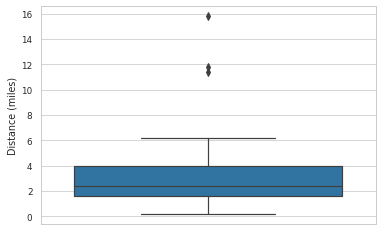

In [14]:
sns.set_style("whitegrid")
sns.set_context("paper")

sns.boxplot(data = df, y="Distance (miles)")

A similar, slightly less exageratted, pattern can be seen when looking at the "Average Time" columns. 

<AxesSubplot:ylabel='Average Time (hours)'>

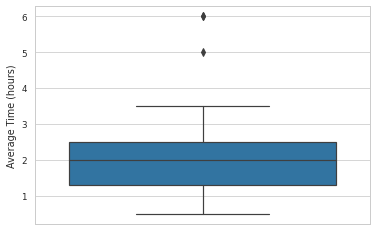

In [15]:
sns.boxplot(data = df, y="Average Time (hours)")

Using histograms we can see that the distributions for both of these are skewed to the right. 

<AxesSubplot:xlabel='Distance (miles)', ylabel='Count'>

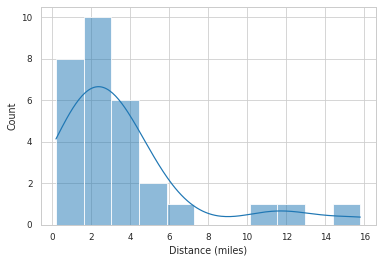

In [16]:
sns.histplot(data = df, x = "Distance (miles)", kde = True)

<AxesSubplot:xlabel='Average Time (hours)', ylabel='Count'>

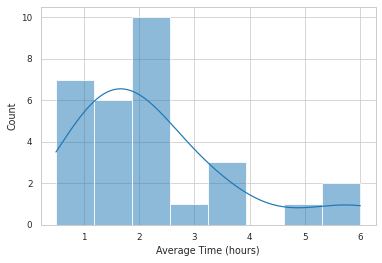

In [17]:
sns.histplot(data = df, x = "Average Time (hours)", kde = True)

Looking at the distribution for "Difficulty" shows a different story. This distribution is closer to a normal distribution than the others. 

<AxesSubplot:ylabel='Count'>

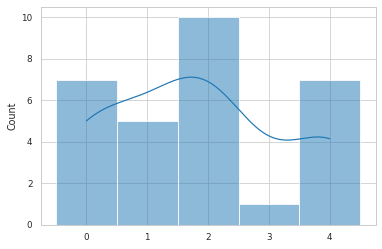

In [18]:
sns.histplot(df , x = sorted(df['Difficulty']), kde = True)

Next, I wanted to visualize the relationship between our three different variables. I decided to use a scatter plot to do so. 

<AxesSubplot:xlabel='Distance (miles)', ylabel='Average Time (hours)'>

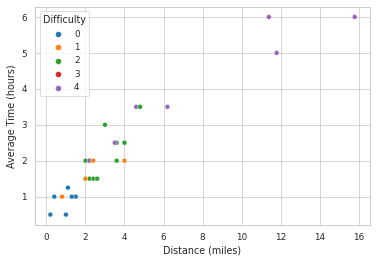

In [19]:
sns.scatterplot(data = df, x = "Distance (miles)", y = "Average Time (hours)",
                hue = "Difficulty", hue_order = ['0','1','2','3','4'])

Looking at this chart became apparent to me. First of all, the Difficulty rating's don't seem to follow a strict linear model. Some of the Difficulty "4" trails have Time and Distance's that are similar to trails of much lower Difficulty ratings. Also, the samples with a Difficulty rating of 4 (strenuous) fall between broad range of Average Times and Distances. Trails with other Difficulty ratings can be found in tightly knit groups. To further investigate this phenomena, I decided to take a look at the standard deviations for each individual Difficulty rating.  

In [20]:
std_df = pd.DataFrame()



for x in sorted(df['Difficulty'].unique()):
    _std_df = pd.DataFrame(
        data = {
        "Difficulty": x,
        "Distance (std)" : df[df['Difficulty'] == str(x)]['Distance (miles)'].describe().loc['std'],
        "Time (std)" :df[df['Difficulty'] == str(x)]['Average Time (hours)'].describe().loc['std']
        
    },
    
        index =[0] )
                

    std_df = pd.concat([std_df,_std_df])
    

std_df = std_df.set_index(['Difficulty'])

In [21]:
std_df

,Distance (std),Time (std)
Difficulty,,
0,0.621059,0.365963
1,1.199166,0.500000
2,0.921110,0.677003
3,NaN,NaN
4,5.090748,1.618347


<AxesSubplot:xlabel='Difficulty', ylabel='Distance (std)'>

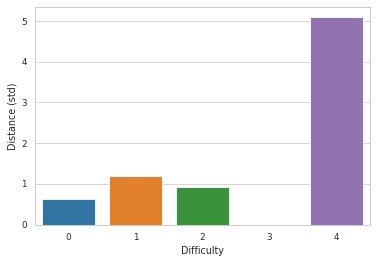

In [22]:
sns.barplot(data = std_df, y = 'Distance (std)',x = std_df.index)

<AxesSubplot:xlabel='Difficulty', ylabel='Time (std)'>

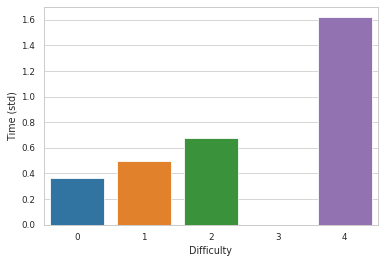

In [23]:
sns.barplot(data = std_df, y = 'Time (std)',x = std_df.index)

So what's exactly going on? If the difficulty of the trails aren't being purely determined by their distance and time taken to complete, there has to be some sort of missing variable that I didn't collect. Well the answer to this didn't take me long to find out. Based on our bar charts, it becomes very obvious that the our trails with a difficulty of "4" have a lot more deviation than the trails of other difficulty ratings. Looking at the raw data makes this just as obvious. 


In [24]:
df[df['Difficulty'] == '4']

,Name,Distance (miles),Average Time (hours),Difficulty
2,Turtlehead Peak,4.6,3.5,4
5,Grand Circle Loop,11.4,6.0,4
6,White Rock Mountain Loop,6.2,3.5,4
10,North Peak,11.8,5.0,4
11,Bridge Mountain,15.8,6.0,4
14,Ice Box Canyon,2.2,2.0,4
24,Kraft Mountain Loop Hike,3.5,2.5,4


The two most egregious examples here are Ice Box Canyon and Kraft Mountain Loop Hike. 

Here's the description found on Kraft Mountain Loop Hike's page. 
> This trail starts at the end of Sandstone Drive within Calico Basin. Follow the trail around Kraft Mountain as it takes you into a colorful wash. The trail features intense elevation gain and rock scrambling.

And Ice Box Canyon.

>The trail takes you through a cool, shady box canyon with seasonal waterfalls (December-April) in the heart of Red Rock Canyon National Conservation Area. The narrow canyon rarely sees sunlight, and the cool water and air pouring down from the mountains keep it significantly cooler than the open desert. But you will have to cross the open desert to get there and scramble on boulders & loose rocks within the wash to get to the end of the canyon.

Based on both of these descriptions, there are a few key words that describe the things that make them considered a strenuous hike. The challenge from Kraft Mountain Loop comes from the "intense elevation gain and rock scrambling". For Ice Box Canyon, the extra bit of difficulty comes from the fact that you need to "scramble on boulders and loose rocks" to complete the trail.

To further illustrate this I will be using the clustering algorithm K-Means. To explain briefly, K-Means is a unsupervised clustering algorithm that attempts to create categories based on similarities in the ob servations 0  of our dataset.                                                    

In [25]:
from sklearn.cluster import KMeans

In [26]:
k_means_model = KMeans(n_clusters=5)

In [27]:
k_means_model.fit(df[['Distance (miles)','Average Time (hours)']])

KMeans(n_clusters=5)

In [28]:
df['k_means_predictions'] = pd.Series(k_means_model.labels_)

In [29]:
df

,Name,Distance (miles),Average Time (hours),Difficulty,k_means_predictions
0,Moenkopi Loop,2.0,1.50,0,4
1,Calico Tanks,2.2,2.00,3,4
2,Turtlehead Peak,4.6,3.50,4,0
3,Keystone Thrust,2.4,1.50,2,4
4,White Rock – Willow Springs,4.0,2.50,2,0
5,Grand Circle Loop,11.4,6.00,4,3
6,White Rock Mountain Loop,6.2,3.50,4,0
7,Willow Spring Loop,1.1,1.25,0,2
8,La Madre Spring,3.6,2.00,2,0
9,Petroglyph Wall,0.2,0.50,0,2


<AxesSubplot:xlabel='Distance (miles)', ylabel='Average Time (hours)'>

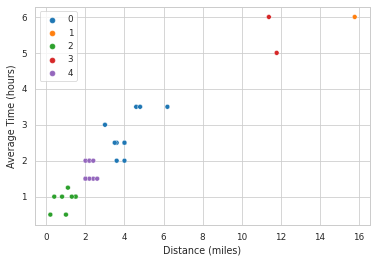

In [30]:
sns.scatterplot(data = df, x = "Distance (miles)", y = "Average Time (hours)", 
           hue = pd.Series(k_means_model.labels_).astype(str),hue_order = ['0','1','2','3','4'])

Summarizing all of my analysis, Distance and Time are not enough on their own to determine the difficulty of a hike. Based on some of the examples I've given, we can determine that change in elevation, as well as the sheerness of that change are both very important factors as well. Unfortunately, this type of information only seems to be provided in the descriptions of the two examples I've given above. If I had to make a suggestion to those who run the Red Rock Website, it would be to include metrics regarding this to each of the trails. It wouldn't necessarily have to be an exact measurement in the change of elevation; even an ordinal variable could potentially provide a better user experience to those who are trying to preview their choice of trails at Red Rock Canyon. 